## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [72]:
sns.set_theme(context='notebook', style="white", palette=sns.color_palette("hls", 8))

In [2]:
path = r"C:\Users\sahin\Documents\Instacart Basket Analysis"

* Import the dataset

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_part1_ords_prods_customer.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


#### Bar Chart

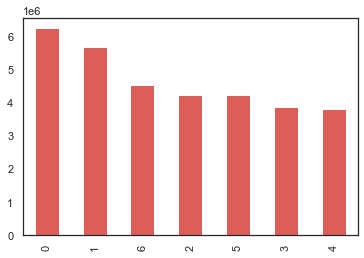

In [73]:
bar = df['orders_day_of_the_week'].value_counts().plot.bar()

##### sort index 

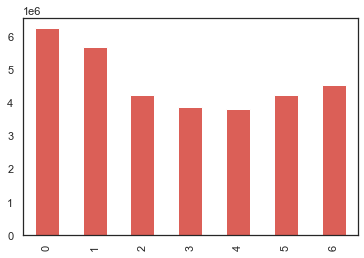

In [74]:
bar1 = df['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

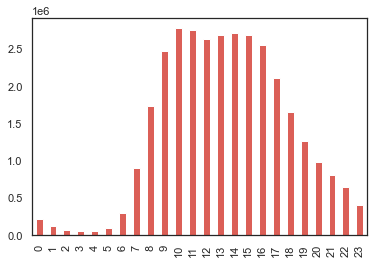

In [78]:
bar1a = df['order_hour_of_day'].value_counts().sort_index().plot.bar()

#### Histogram

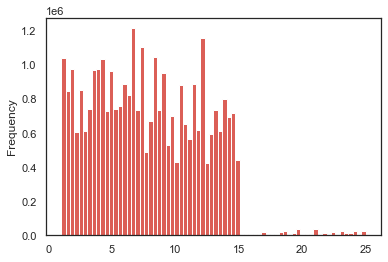

In [75]:
hist = df['prices'].plot.hist(bins = 70)

In [8]:
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [9]:
df['prices'].min()

1.0

In [10]:
df['prices'].mean()

11.980225638676366

In [11]:
df['prices'].median()

7.4

In [12]:
df['prices'].max()

99999.0

* In this exercise, we saw that outliers (prices > 100) caused the one large column in the histogram. So, I will replace outlier values with nan

In [13]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [14]:
df['prices'].max()

25.0

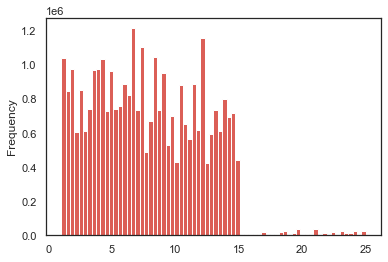

In [76]:
hist_1 = df['prices'].plot.hist(bins = 70)

#### Line Chart

#### Sampling

** I will take a random sample of 30% of the data

##### setting the random seed

In [16]:
np.random.seed(4)

##### list storing boolean values

In [17]:
dev = np.random.rand(len(df)) <= 0.7

##### split df in to two samples

In [18]:
big = df[dev]

In [19]:
small = df[~dev]

##### double checking big and small contain all data

In [20]:
len(df)

32641268

In [21]:
len(big) + len(small)

32641268

#### Line Chart

##### creating smaller df to speed up processing

In [22]:
df_2 = small[['orders_day_of_the_week', 'prices']]

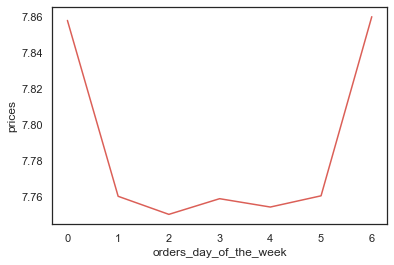

In [77]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices', ci=None)

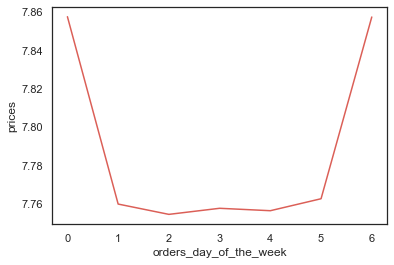

In [81]:
line = sns.lineplot(data = df, x = 'orders_day_of_the_week', y = 'prices', ci=None)

3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

* Histogram : 'order_hour_of_day'

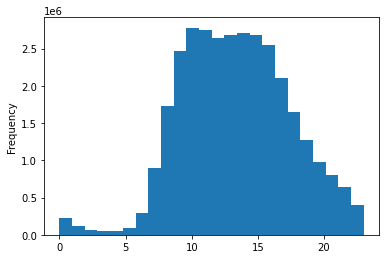

In [24]:
hist_2 = df['order_hour_of_day'].plot.hist(bins = 24)

*** The histogram tells us that most of the orders are placed in the middle of the day.

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

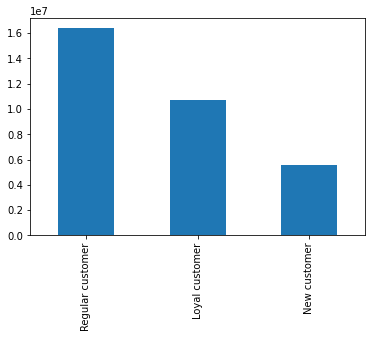

In [25]:
bar2 = df['loyalty_flag'].value_counts().plot.bar()

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

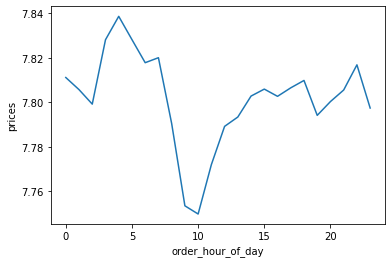

In [26]:
line_1 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices', ci=None)

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
** In a markdown cell beneath your line chart, describe what the line chart shows.

* Line chart : age & n_dependents

##### creating smaller df to speed up processing

In [27]:
df_3 = small[['age', 'n_dependants']]

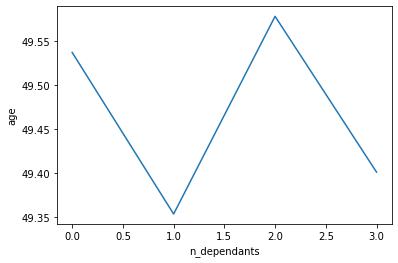

In [28]:
line_2 = sns.lineplot(data = df_3, x = 'n_dependants', y = 'age', ci=None)

** I could not see any positive or negative correlation between variables.

In [29]:
df['age'].mean()

49.4653546240912

7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
** In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

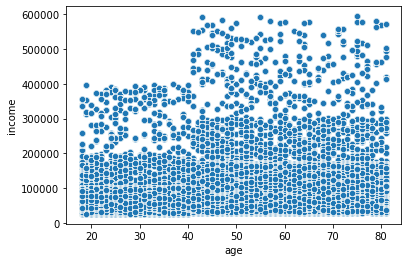

In [30]:
scatter = sns.scatterplot(data = df, x = 'age', y = 'income' )

** This scatterplot show that there is a positive correlation between age and income variables.

8. Export your visualizations as “.png” files in your relevant project folder.

#### exporting visualizations

In [31]:
# orders_day_of_the_week bar

In [32]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'orders_day_of_the_week_bar.png'))

In [33]:
# prices histogram

In [34]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'prices_hist.png'))

In [35]:
# orders_day_of_the_week & prices line chart

In [36]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'orders_day_of_the_week_prices_line.png'))

In [37]:
# order_hour_of_day histogram

In [38]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'order_hour_of_day_hist.png'))

In [39]:
# loyalty_flag bar

In [40]:
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'loyalty_flag_bar.png'))

In [41]:
# order_hour_of_day & prices linechart

In [42]:
line_1.figure.savefig(os.path.join(path, '04 Analysis', 'order_hour_of_day_prices_line.png'))

In [43]:
# dependants & age line chart

In [44]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'n_dependants_age_line.png'))

In [45]:
# age_income scatter

In [46]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'age_income_scatter.png'))